In [24]:
# imports
import numpy as np
import csv
import json
import matplotlib.pyplot as plt

In [25]:
# File path

EXP_1_CSV_FILE_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/Ensemble/SL-GCN/prediction/1/stat.csv"
EXP_2_CSV_FILE_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/Ensemble/SL-GCN/prediction/2/stat.csv"
EXP_5_CSV_FILE_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/Ensemble/SL-GCN/prediction/5/stat.csv"

TOP_SIZE = 10

In [26]:
# Load data csv

exp_1_dict = dict()
with open(EXP_1_CSV_FILE_PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        exp_1_dict[str(row[0])] = {
            'label': int(row[1]),
            'score_diff': float(row[2]),
            'score_diff_softmax': float(row[3]),
            'score': np.array([float(row[i + 4]) for i in range(2000)])
        }

exp_2_dict = dict()
with open(EXP_2_CSV_FILE_PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        exp_2_dict[str(row[0])] = {
            'label': int(row[1]),
            'score_diff': float(row[2]),
            'score_diff_softmax': float(row[3]),
            'emotion': np.array([float(row[i + 4]) for i in range(8)]),
            'score': np.array([float(row[i + 12]) for i in range(2000)])
        }

exp_5_dict = dict()
with open(EXP_5_CSV_FILE_PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        exp_5_dict[str(row[0])] = {
            'label': int(row[1]),
            'score_diff': float(row[2]),
            'score_diff_softmax': float(row[3]),
            'emotion': np.array([float(row[i + 4]) for i in range(8)]),
            'score': np.array([float(row[i + 12]) for i in range(2000)])
        }

In [27]:
def acc_top(top: int, exp_dict: dict):
    if top == 1:
        top_count = sum([1.0 if el['label'] == el['score'].argsort()[-top] else 0.0 for _ , el in exp_dict.items()])
    else:
        top_count = sum([1.0 if el['label'] in el['score'].argsort()[-top:] else 0.0 for _ , el in exp_dict.items()])
    # print(f"{top_count} / {len(exp_dict)}")
    return float(top_count / len(exp_dict))

[0.2824, 0.4315, 0.513, 0.5667, 0.5997, 0.6309, 0.6515, 0.6687, 0.6849, 0.7]
True


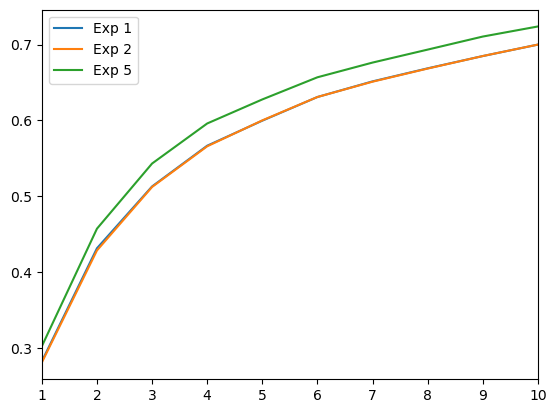

In [28]:
x = range(1,TOP_SIZE+1)

y_1 = [np.round(acc_top(top, exp_1_dict), 4) for top in range(1,TOP_SIZE+1)]
y_2 = [np.round(acc_top(top, exp_2_dict), 4) for top in range(1,TOP_SIZE+1)]
y_5 = [np.round(acc_top(top, exp_5_dict), 4) for top in range(1,TOP_SIZE+1)]

print(y_1)

different = False
for i in range(len(y_1)):
    if y_1[i] == y_2[i]:
        continue
    different = True

print(different)

plt.plot(x, y_1, label = "Exp 1")
plt.plot(x, y_2, label = "Exp 2")
plt.plot(x, y_5, label = "Exp 5")
ax = plt.gca()
ax.set_xlim([1, TOP_SIZE])
plt.legend()
plt.show()

Exp1 is sligly better then epx2 but in the graph they mostly are over eachother.